In [21]:
import numpy as np
import cv2
import os
import json
import matplotlib.pyplot as plt

In [5]:
base_path = 'edinburg_pig/annotated/2019_11_05/000002'
video_path = os.path.join(base_path, 'color.mp4')
annotations_path = os.path.join(base_path, 'output.json')


In [6]:
with open(annotations_path) as json_file:
    annotations = json.load(json_file)


In [34]:
annotations

{'videoFileName': 'color.mp4',
 'fullVideoFilePath': 'test_pigs_05_11_19A/2019-11-05--12:27:11/000002+',
 'stepSize': 0.1,
 'config': {'stepSize': 0.1,
  'playbackRate': 0.4,
  'imageMimeType': 'image/jpeg',
  'imageExtension': '.jpg',
  'framesZipFilename': 'extracted-frames.zip',
  'consoleLog': False},
 'objects': [{'frames': [{'frameNumber': 0,
     'bbox': {'x': 196, 'y': 299, 'width': 240, 'height': 121},
     'isGroundTruth': True,
     'visible': True,
     'behaviour': 'investigating'},
    {'frameNumber': 1,
     'bbox': {'x': 196, 'y': 290, 'width': 261, 'height': 122},
     'isGroundTruth': True,
     'visible': True,
     'behaviour': 'investigating'},
    {'frameNumber': 2,
     'bbox': {'x': 196, 'y': 283, 'width': 251, 'height': 190},
     'isGroundTruth': True,
     'visible': True,
     'behaviour': 'investigating'},
    {'frameNumber': 3,
     'bbox': {'x': 196, 'y': 289, 'width': 260, 'height': 153},
     'isGroundTruth': True,
     'visible': True,
     'behaviour'

In [35]:
annotations['objects'][0]['frames'][:4]

[{'frameNumber': 0,
  'bbox': {'x': 196, 'y': 299, 'width': 240, 'height': 121},
  'isGroundTruth': True,
  'visible': True,
  'behaviour': 'investigating'},
 {'frameNumber': 1,
  'bbox': {'x': 196, 'y': 290, 'width': 261, 'height': 122},
  'isGroundTruth': True,
  'visible': True,
  'behaviour': 'investigating'},
 {'frameNumber': 2,
  'bbox': {'x': 196, 'y': 283, 'width': 251, 'height': 190},
  'isGroundTruth': True,
  'visible': True,
  'behaviour': 'investigating'},
 {'frameNumber': 3,
  'bbox': {'x': 196, 'y': 289, 'width': 260, 'height': 153},
  'isGroundTruth': True,
  'visible': True,
  'behaviour': 'investigating'}]

In [78]:
def draw(frame, label, x, y, w, h):
    # Draw a bounding box.
    frame_gt = frame
    cv2.rectangle(frame_gt, (x,y),(x+w,y+h), (255, 178, 50), 3)
    
    #label = '%.2f' % conf
        
    # Get the label for the class name and its confidence
    #if classes:
    #   assert(classId < len(classes))
    #label = '%s' % (obj_list[classId]) #uncomment if you have a class_lists.txt with class names in it

    #Display the label at the top of the bounding box
    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    top = max(y, labelSize[1])
    frame_gt = cv2.rectangle(frame_gt, (x, int(top - round(1.5*labelSize[1]))), (x + int(round(1.5*labelSize[0])), top + baseLine), (255, 255, 255), cv2.FILLED)
    frame_gt = cv2.putText(frame_gt, label, (x, top), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 1)
    return frame_gt

In [79]:
cap = cv2.VideoCapture(video_path)
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )
cap.set(1, 3*365)

1800


True

In [96]:
cap.set(1, 3*599)
ret, frame = cap.read()
for pig in annotations['objects']:
    _id = pig['id']
    if int(_id) != 1:
        continue
    box = pig['frames'][-1]
    print(_id, box)
    frame = draw(frame, f'id:{_id}; {box["behaviour"]}', box['bbox']['x'], box['bbox']['y'],
                 box['bbox']['width'], box['bbox']['height'])

1 {'frameNumber': 599, 'bbox': {'x': 820, 'y': 352, 'width': 127, 'height': 181}, 'isGroundTruth': True, 'visible': True, 'behaviour': 'investigating'}


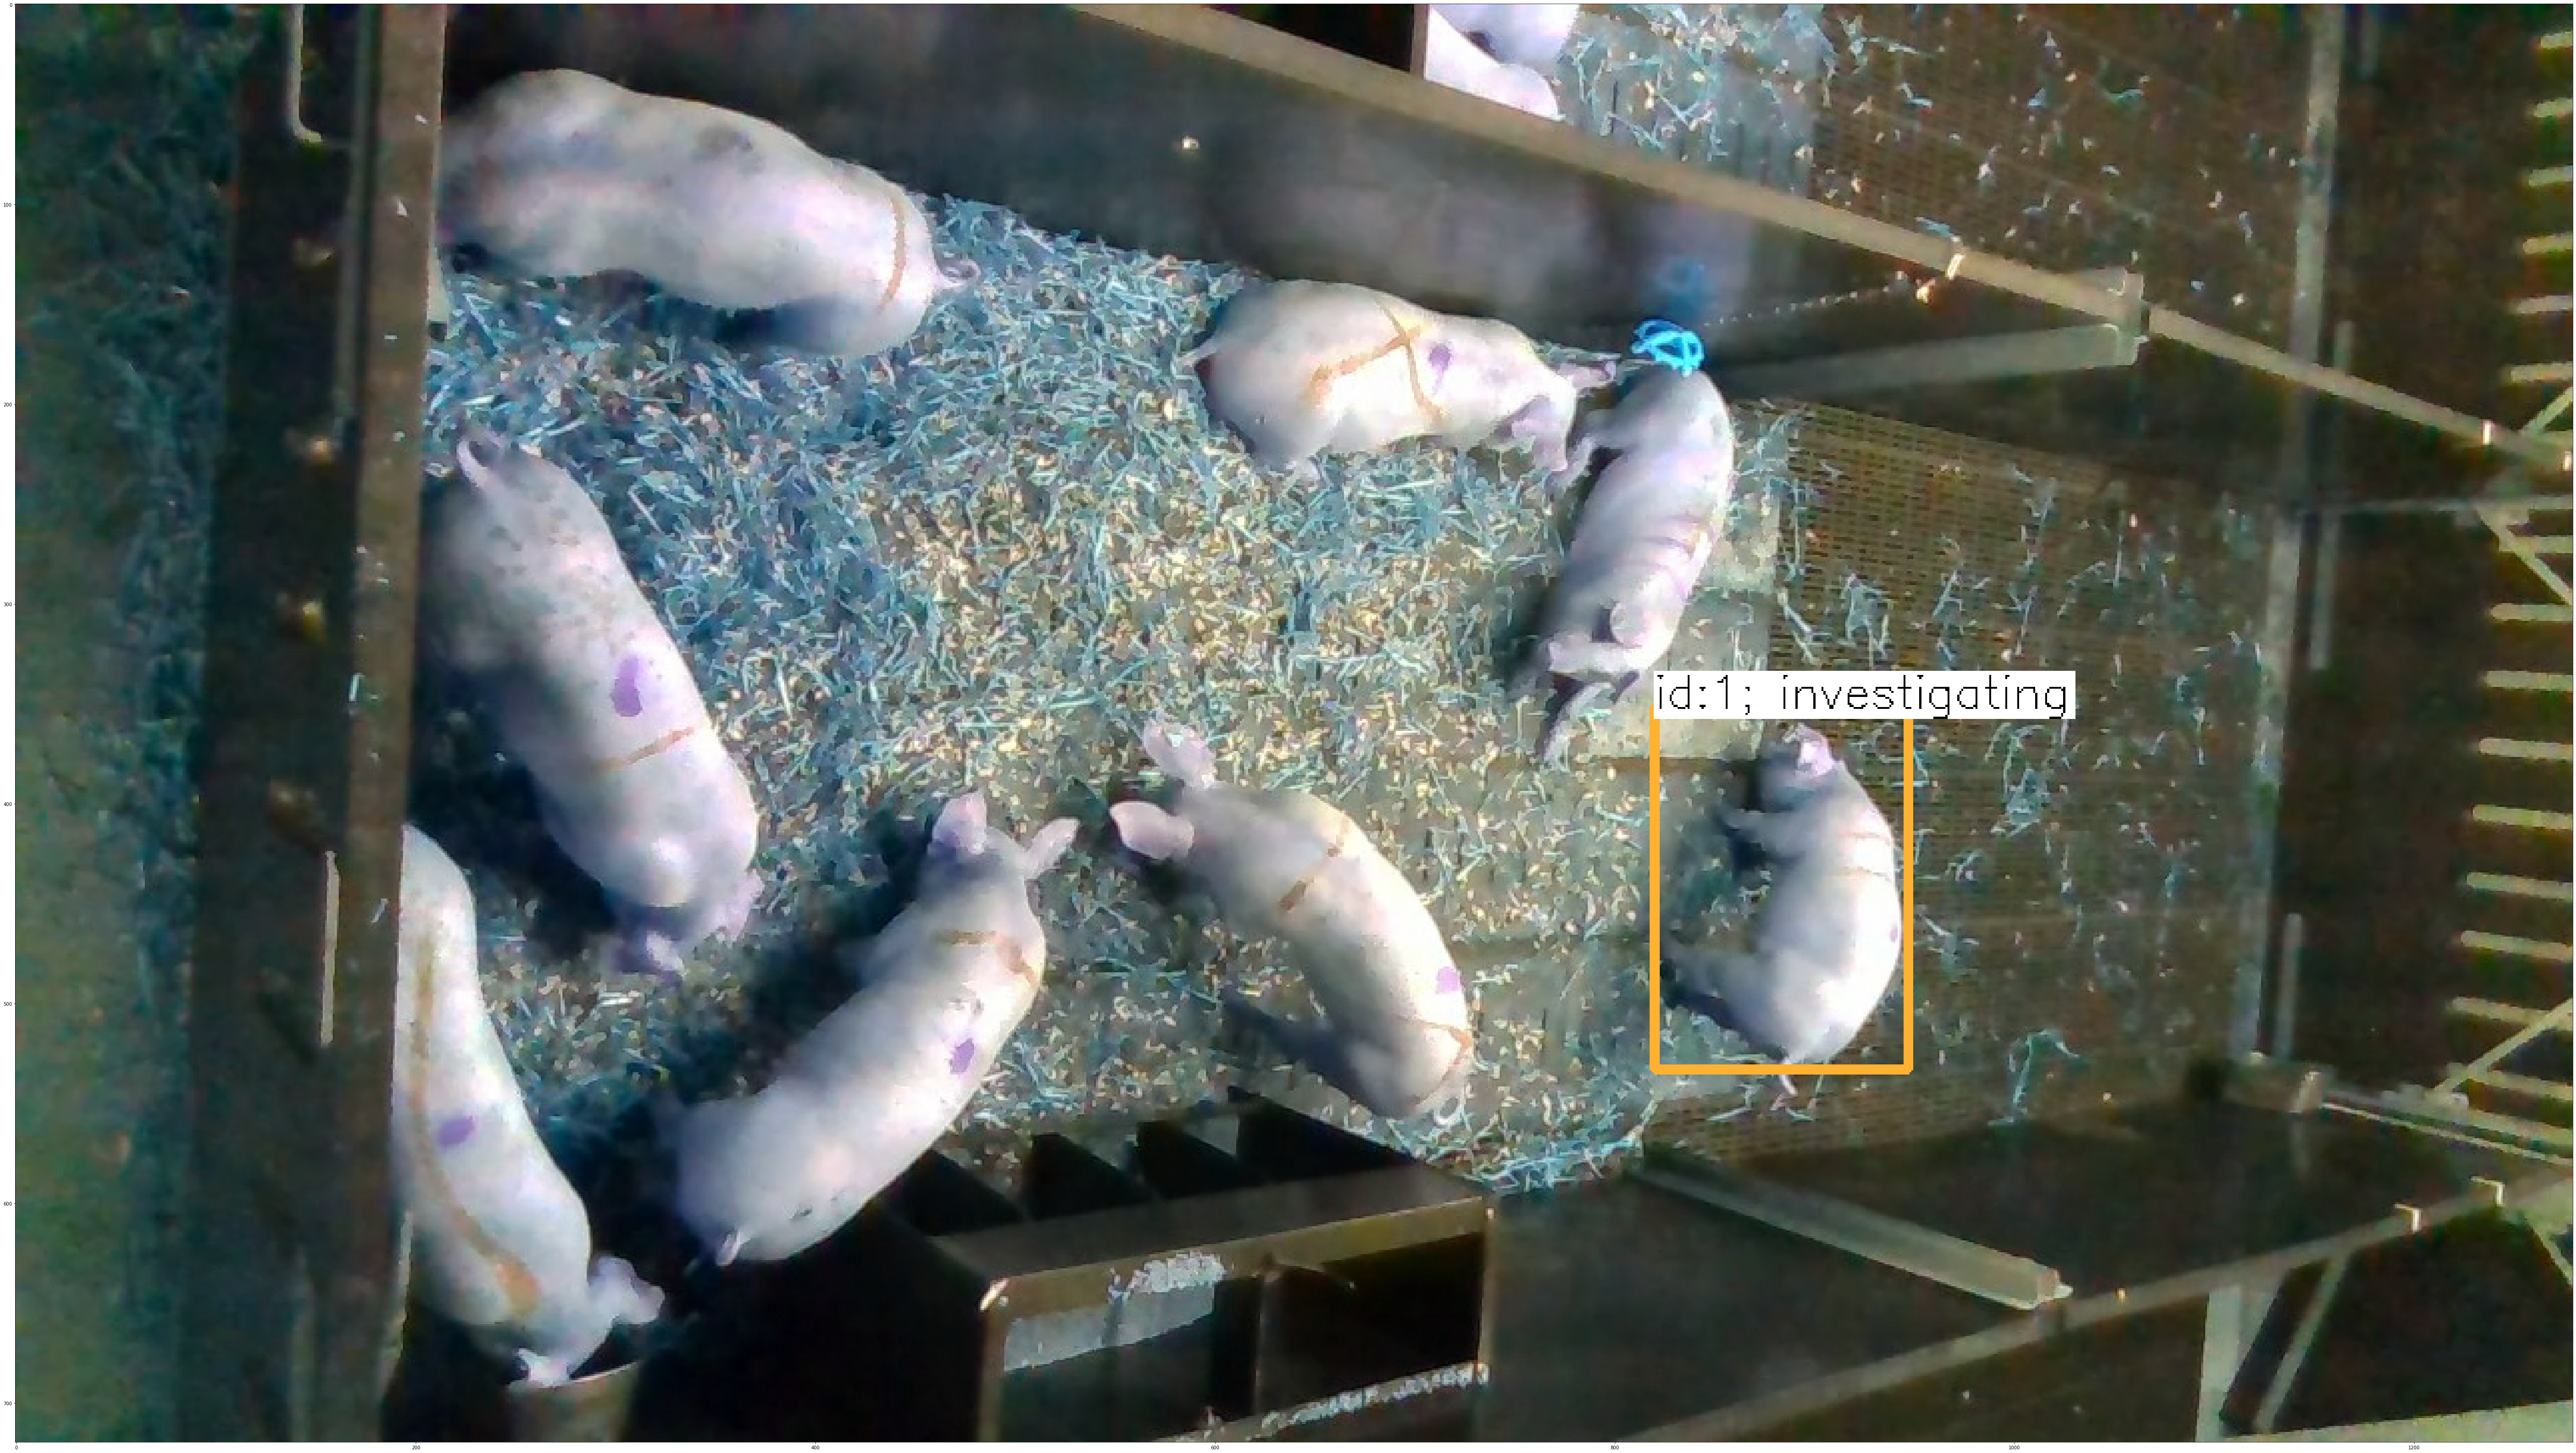

In [97]:
plt.figure(figsize = (100,100))
plt.imshow(frame)

In [98]:
cv2.imwrite('demo_solo.jpeg', frame)

True